In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. \
import matplotlib.pyplot as plt
import time

TRAIN_DIR ='/content/gdrive/My Drive/PlantVillage'#path of dataset
IMG_SIZE =128
input_shape=(IMG_SIZE,IMG_SIZE,3)

In [ ]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

def create_train_data():
    training_data = []
    
    for folder in os.listdir(TRAIN_DIR):
        i=0
        for img in os.listdir(TRAIN_DIR+"/"+folder):
            i+=1
            path = os.path.join(TRAIN_DIR+"/"+folder,img)
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()


In [ ]:
os.listdir('/content/gdrive/My Drive/PlantVillage')


['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

In [ ]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_x.shape


(7025, 128, 128, 3)

In [ ]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)       

In [ ]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 222s 3s/step - loss: 2.1868 - accuracy: 0.3036 - val_loss: 2.7302 - val_accuracy: 0.0819
Epoch 2/20
88/88 [==============================] - 224s 3s/step - loss: 1.3202 - accuracy: 0.5708 - val_loss: 3.1968 - val_accuracy: 0.0819
Epoch 3/20
88/88 [==============================] - 224s 3s/step - loss: 0.9476 - accuracy: 0.6746 - val_loss: 3.8662 - val_accuracy: 0.1025
Epoch 4/20
88/88 [==============================] - 223s 3s/step - loss: 0.7558 - accuracy: 0.7489 - val_loss: 3.1051 - val_accuracy: 0.1808
Epoch 5/20
88/88 [==============================] - 224s 3s/step - loss: 0.6241 - accuracy: 0.7964 - val_loss: 1.6255 - val_accuracy: 0.4555
Epoch 6/20
88/88 [==============================] - 223s 3s/step - loss: 0.5133 - accuracy: 0.8258 - val_loss: 0.8400 - val_accuracy: 0.7181
Epoch 7/20
88/88 [==============================] - 224s 3s/step - loss: 0.4322 - accuracy: 0.8550 - val_loss: 0.6229 - val_accuracy: 0.7843
Epoch 8/20
88

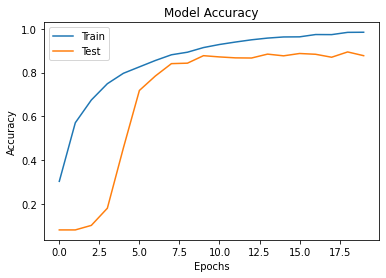

In [ ]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()


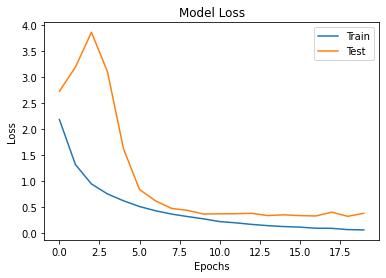

In [ ]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions


array([[7.5527729e-05, 9.9874383e-01, 1.3718537e-06, ..., 5.5096980e-09,
        4.4801051e-05, 1.9332522e-09],
       [2.0093108e-08, 5.6062828e-12, 8.0428468e-12, ..., 4.2442611e-08,
        1.5586642e-10, 4.4994359e-11],
       [2.1764353e-09, 2.0920448e-08, 2.4017262e-07, ..., 7.1863077e-08,
        1.1097746e-07, 9.5173149e-08],
       ...,
       [9.7552470e-07, 1.0739884e-08, 4.8843262e-08, ..., 2.9750326e-01,
        7.0225030e-01, 1.6231394e-06],
       [2.7406077e-06, 1.4758324e-06, 5.2514883e-07, ..., 2.9824889e-06,
        1.3887134e-04, 3.9903662e-05],
       [5.9015355e-03, 6.6090969e-04, 6.3291717e-01, ..., 8.4447629e-06,
        2.7242839e-02, 6.8522488e-05]], dtype=float32)

In [ ]:
y_preds = [np.argmax(i) for i in predictions]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 87   3   2   0   0   0   0   4   0   0   0   1   0   3   1]
 [  4  87   0   3   3   0   0   1   0   0   0   0   0   1   0]
 [  0   0  93   0  11   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  28   3   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0  91   0   1   0   0   0   0   2   0   0   0]
 [  0   0   0   1   4 102   0   0   0   0   1   0   0   0   2]
 [  0   0   0   0   0   0  70   0   0   1   0   1   1   0   1]
 [  0   0   0   0   1   0   0  95   4   0   0   1   0   0   0]
 [  0   0   0   0   2   0   0   3 109   0   0   1   0   0   0]
 [  3   1   0   0   6   8   0   1   2  61   0   9   0   2   3]
 [  0   0   1   0   0   5   0   0   0   0  94   0   0   0   1]
 [  1   0   2   0   6   0   0   0   0   5   0  79   4   3   0]
 [  0   0   1   0   2   0   0   0   0   2   2   2  87   5   0]
 [  0   1   5   0   2   1   1   0   2   2   0   0   3  75   1]
 [  0   0   0   0   2   5   0   0   0   2   0   1   0   0  74]]
              precision    recall  f1-score   support


In [ ]:
custom = model.fit_generator(train_generator, epochs=30, validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
176/176 [==============================] - 241s 1s/step - loss: 0.8877 - accuracy: 0.7219 - val_loss: 0.5138 - val_accuracy: 0.8228
Epoch 2/30
176/176 [==============================] - 246s 1s/step - loss: 0.6658 - accuracy: 0.7714 - val_loss: 0.5159 - val_accuracy: 0.8278
Epoch 3/30
176/176 [==============================] - 246s 1s/step - loss: 0.5591 - accuracy: 0.8100 - val_loss: 0.3884 - val_accuracy: 0.8733
Epoch 4/30
176/176 [==============================] - 246s 1s/step - loss: 0.5172 - accuracy: 0.8233 - val_loss: 0.5593 - val_accuracy: 0.8221
Epoch 5/30
176/176 [==============================] - 247s 1s/step - loss: 0.4982 - accuracy: 0.8329 - val_loss: 0.4398 - val_accuracy: 0.8534
Epoch 6/30
176/176 [==============================] - 249s 1s/step - loss: 0.4588 - accuracy: 0.8425 - val_loss: 0.3527 - val_accuracy: 0.8747
Epoch 7/30
176/176 [==============================] - 250s 1s/step

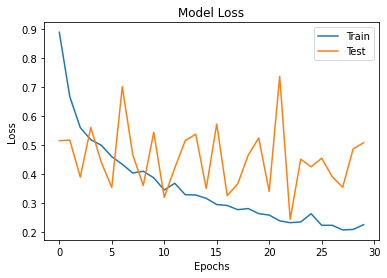

In [ ]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()


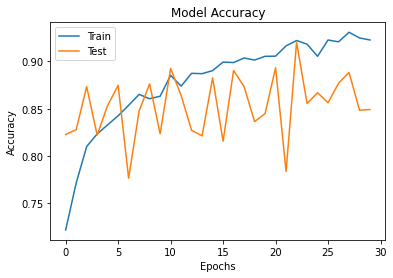

In [ ]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()


In [ ]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]


In [ ]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 93   4   1   0   0   0   0   0   0   0   0   0   0   3   0]
 [  0  98   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 104   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0  25   0   3   0   0   0   0   0   0   0   1   0]
 [  1   0   4   1  76   1   2   0   0   5   2   0   0   0   3]
 [  0   0   0   1   0  81   2   0   0   0  22   0   0   4   0]
 [  0   0   0   0   0   0  72   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0  93   4   0   0   0   1   0   3]
 [  0   1   0   0   4   4   0   1  87  17   0   0   0   1   0]
 [  0   0   0   0   2   6   2   0   1  76   0   2   0   6   1]
 [  0   0   0   0   0   0   0   0   0   0 101   0   0   0   0]
 [  1   0   1   0   3   0   1   0   0   9   3  76   1   3   2]
 [  2   0   0   0   1   0  13   0   0   1   1   0  72   9   2]
 [  1   0   1   0   2   0   2   0   0   0   0   0   0  87   0]
 [  0   0   0   1   0   4   6   0   0   3  18   0   0   0  52]]
              precision    recall  f1-score   support


In [ ]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']  

Tomato_Leaf_Mold


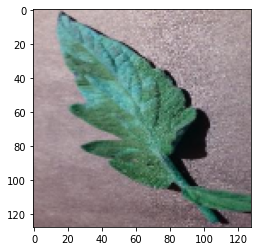

In [ ]:
plt.imshow(train_x[1000])
plt.show
print(classes[train_y[1000]])

In [ ]:
from tensorflow.keras.preprocessing import image
test=train_x[1000]
test=image.img_to_array(test)
test=test.reshape((-1,IMG_SIZE,IMG_SIZE,3))
predictions = model.predict(test)
predictions


array([[7.3869101e-04, 4.9478448e-09, 1.8847544e-05, 2.6710348e-10,
        7.4640472e-10, 1.5528839e-07, 9.7155537e-09, 5.3191451e-10,
        1.0531375e-09, 4.7228201e-07, 2.4474647e-07, 3.6191495e-04,
        5.7047635e-01, 4.2840335e-01, 1.3288228e-08]], dtype=float32)

In [ ]:
classes[np.argmax(predictions)]


'Tomato_Leaf_Mold'